In [266]:
plot1 = [1, 3]
plot2 = [2, 5]

In [267]:
x_axis = plot1[0]-plot2[0]
y_axis = plot1[1]-plot2[1]

euclidean_distance = sqrt((x_axis)**2 + (y_axis)**2)

In [268]:
print(euclidean_distance)

2.23606797749979


## Writing our Euclidean Distance

In [269]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter

style.use('fivethirtyeight')

In [270]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

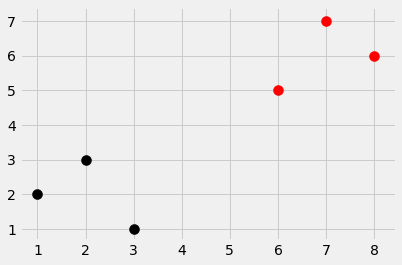

In [271]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

plt.show()

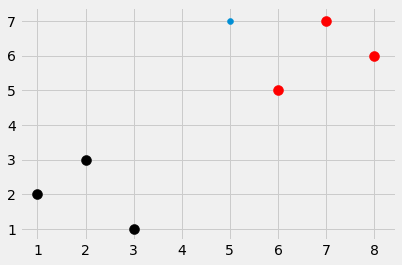

In [272]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
plt.show()

In [273]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distance = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distance.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distance)[:k]]
    # print(Counter(votes).most_common(1))
    # if you uncomment this, it will print out all the list
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

result = k_nearest_neighbors(dataset, new_features)
print(result)

('r', 1.0)


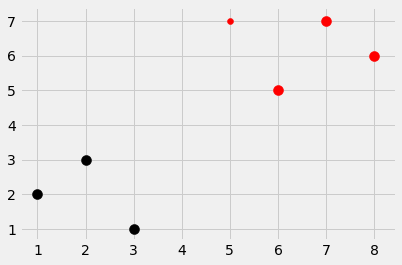

In [274]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result[0])
plt.show()

In [275]:
import pandas as pd
import random

In [276]:
df = pd.read_csv('C:/Users/DAMILOLA/Desktop/Breast Cancer Dataset/breast-cancer-wisconsin.data')

In [277]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [278]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [279]:
full_data = df.astype(float).values.tolist()

In [280]:
random.shuffle(full_data)

In [281]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [282]:
for i in train_data:
    train_set[i[-1]].append(i[:-1]) # putting the data into the train_set

In [283]:
for i in test_data:
    test_set[i[-1]].append(i[:-1]) # putting the data into the test_set

In [284]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:', correct/total)

0.6
0.8
0.6
0.8
Accuracy: 0.9712230215827338


What happens if we increase the value of k

In [285]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=25)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:', correct/total)

0.76
0.76
0.72
0.68
0.64
Accuracy: 0.9640287769784173


In [286]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=50)
        if group == vote:
            correct += 1
        total += 1
        
print('Accuracy:', correct/total)

Accuracy: 0.9496402877697842


In [287]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=1)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:', correct/total)

C:\Users\DAMILOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


1.0
1.0
1.0
1.0
Accuracy: 0.9712230215827338


In [290]:
for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
        
print('Accuracy:', correct/total)

0.6
0.8
0.6
0.8
Accuracy: 0.9712230215827338


In [292]:
accuracies = []

for i in range(25):
    df = pd.read_csv('C:/Users/DAMILOLA/Desktop/Breast Cancer Dataset/breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)
    
    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]
    
    for i in train_data:
        train_set[i[-1]].append(i[:-1]) # putting the data into the train_set
    for i in test_data:
        test_set[i[-1]].append(i[:-1]) # putting the data into the test_set
    
    
    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            total += 1
        
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

0.9628776978417264
